In [1]:
import numpy as np
import pandas as pd
# from plotnine import *
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


# Exploratory Data Analysis
Session Data (Non-Fleet)

## 1 Overview and General


In [2]:
# do verbose sanity checks, and do not save in the end
test = False
# working on EC2 instance
cloud = True

In [3]:
if cloud:
    path = "../../data/"
    file = "sessions_clean.csv"
else:
    path = "/home/ourownstory/github/data/SLAC"
    file = "Charging_Session_SLAC.csv"
    
if test:
    nrows = 1e6
else:
    nrows = None
    
def get_csv():
    print("Reading {} rows of dataframe".format(nrows if nrows is not None else "ALL"))
    return pd.read_csv(path + file, index_col=False, nrows=nrows)#, low_memory=False)

In [5]:
df_raw = get_csv()
df = df_raw.copy(deep=True)

print(df.index.nbytes + df.columns.nbytes + df.values.nbytes)

3583201264


In [8]:
for column in list(df):
    unique = df[column].unique()
    print(column, len(unique))
    if len(unique) < 25:
        print(unique)
    
# column = "Station ID"
# print(sessions[column].value_counts())
# print(len(sessions[column].unique()))

Session ID 11786845
Station ID 8643
Port ID 15732
Connector Type 5
['J1772' 'Combo' 'CHAdeMO' 'NEMA 5-20R' nan]
POI Category 13
['Parking' 'Workplace' 'Retail' 'Municipal' 'Fleet' 'Education'
 'Hospitality' 'Government (Fed, State)' 'Parks and Recreation'
 'Healthcare' 'Multifamily Commercial' 'Multifamily Home Service'
 'Utility']
POI Subcategory 37
Session Time Zone 2
['PDT' 'PST']
Session Time (secs) 133408
Charging Time (secs) 50398
Start SoC 102
End SoC 102
Full Charge 2
[False  True]
Energy (kWh) 8635264
Driver ID 119592
Driver Zip 3532
Vehicle Make 32
Vehicle Model 82
Battery Capacity 68
EV Type 3
['PLUGIN' nan 'HYBRID']
$ Fee 5443
Fee Currency 2
['USD' nan]
Zip Code 230
City 121
County 9
['Santa Clara County' 'San Mateo County' 'Alameda County'
 'San Francisco County' 'Contra Costa County' 'Napa County' 'Marin County'
 'Solano County' 'Sonoma County']
State 1
['California']
Country 1
['United States']
Driver City 2055
Driver State 55
Driver Country 2
['United States' nan]
Max P

In [9]:
column = "Station ID"
# print(sessions[column].value_counts())
print(len(df[column].unique()))

8643


In [10]:
column = "Connector Type"
print(df[column].value_counts(dropna=False))
# print(len(sessions[column].unique()))

J1772         11528751
CHAdeMO         112752
Combo           112646
NEMA 5-20R       32648
NaN                 48
Name: Connector Type, dtype: int64


In [21]:
column = "POI Category"
print(df[column].value_counts(dropna=False) / len(df))
# print(len(sessions[column].unique()))

Workplace                   0.757001
Municipal                   0.089466
Retail                      0.041273
Parking                     0.027665
Education                   0.024938
Multifamily Commercial      0.017819
Healthcare                  0.013942
Fleet                       0.010371
Hospitality                 0.006490
Government (Fed, State)     0.004903
Parks and Recreation        0.004683
Multifamily Home Service    0.001292
Utility                     0.000159
Name: POI Category, dtype: float64


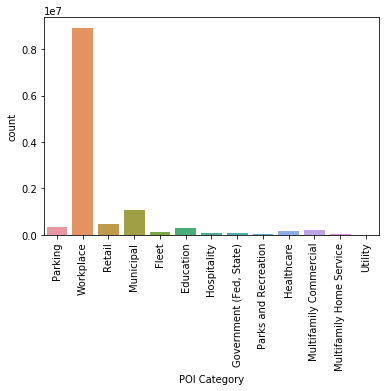

In [25]:
col =  "POI Category"
df_plot = df.copy(deep=True)

ax = sns.countplot(x=col, data=df_plot)
ax = plt.setp(ax.get_xticklabels(), rotation=90)
plt.savefig("plots/POI_categories.png")

In [14]:
col1 = "POI Category"
col2 =  "POI Subcategory"
df_plot = df.copy(deep=True)
df_plot = df_plot.groupby([col1, col2])

# print(df_plot.size())

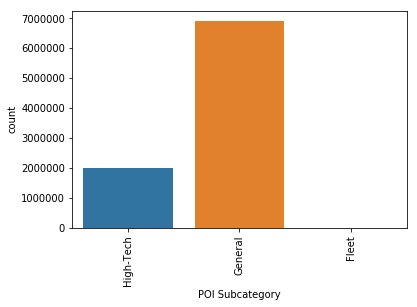

In [15]:
# Workplace Subcategories

col =  "POI Subcategory"
df_plot = df.copy(deep=True)
df_plot = df_plot[df_plot["POI Category"] == "Workplace"]

ax = sns.countplot(x=col, data=df_plot) #, hue="POI Category"
ax = plt.setp(ax.get_xticklabels(), rotation=90)

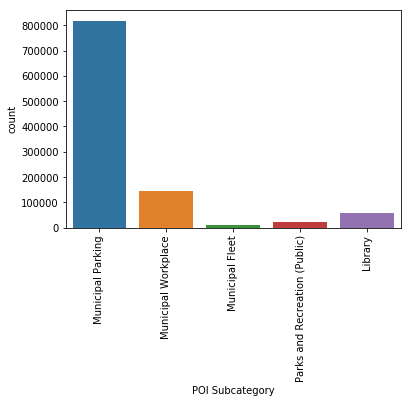

In [16]:
# Municipal Subcategories

col =  "POI Subcategory"
df_plot = df.copy(deep=True)
df_plot = df_plot[df_plot["POI Category"] == "Municipal"]

ax = sns.countplot(x=col, data=df_plot) #, hue="POI Category"
ax = plt.setp(ax.get_xticklabels(), rotation=90)

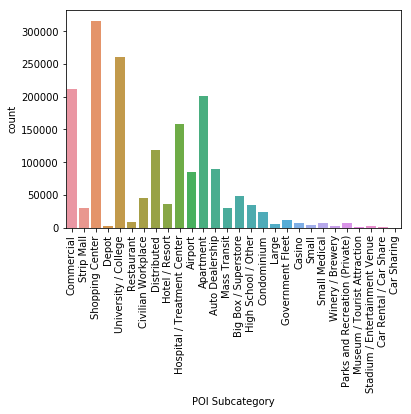

In [24]:
# NOT Workplace, NOT Municipal Subcategories

col =  "POI Subcategory"
df_plot = df.copy(deep=True)
df_plot = df_plot[df_plot["POI Category"] != "Workplace"]
df_plot = df_plot[df_plot["POI Category"] != "Municipal"]

ax = sns.countplot(x=col, data=df_plot)
# ax = sns.countplot(x=col, data=df, hue="POI Category")
ax = plt.setp(ax.get_xticklabels(), rotation=90)
plt.savefig("plots/POI_subcategories_non_work_muni.png")

In [15]:
# removed all other coutries and states

# col = "Country"
# print(sessions[col].value_counts(dropna=False))

In [18]:
col = "Max Power"
df_plot = df[col].value_counts(dropna=False)
print(df.head(20))

    Session ID  Station ID   Port ID Connector Type POI Category  \
0     99999951      155805  208243.0          J1772      Parking   
1     99999911      127071  166451.0          J1772    Workplace   
2     99999881      143745  191547.0          J1772    Workplace   
3     99999861       78433  195605.0          J1772    Workplace   
4     99999851       93629  105187.0          J1772    Workplace   
5     99999761      187543  253063.0          J1772    Workplace   
6     99999741      145785  194419.0          J1772    Workplace   
7     99999691      205681  277751.0          J1772    Workplace   
8     99999631      132311  174233.0          J1772    Workplace   
9     99999581       88527  137541.0          J1772    Workplace   
10    99999441       92301  102813.0          J1772    Workplace   
11    99999401       90773  100103.0          J1772    Workplace   
12    99999371      100029  116391.0          J1772    Workplace   
13    99999191       98019  112783.0          J1

In [19]:
col = "Fee Currency"
df_plot = df[col].value_counts(dropna=False)
print(df_plot)

USD    11786766
NaN          79
Name: Fee Currency, dtype: int64


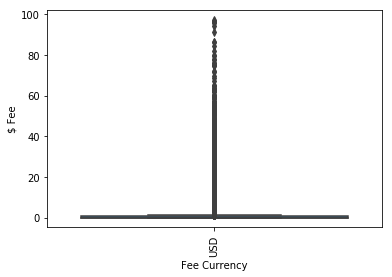

In [12]:
# need to convert or remove other currencies
# done

# col1 = "Fee Currency"
# col2 = "$ Fee"
# df_plot = df.copy(deep=True)

# ax = sns.boxplot(x=col1, y=col2, data=df_plot)
# ax = plt.setp(ax.get_xticklabels(), rotation=90)

/home/ec2-user/anaconda3/envs/eda/lib/python3.7/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


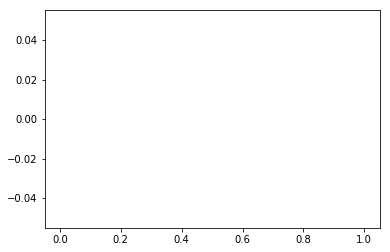

In [20]:
col = "$ Fee"
df_plot = df.copy(deep=True)

# print(np.percentile(df[col], 99))
df_plot = df_plot[df_plot[col] < np.percentile(df[col], 99)]

plot = plt.hist(df_plot[col], bins=50)